In [98]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [121]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [122]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [123]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

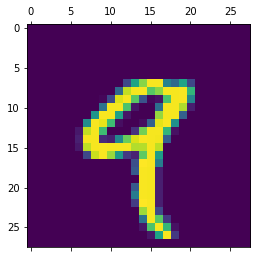

In [124]:
plt.matshow(x_train[4])

In [125]:
x_train = x_train/255
x_test = x_test/255

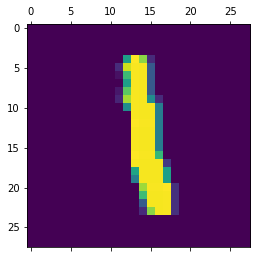

In [126]:
plt.matshow(x_train[6])

In [127]:
x_train_flattened=x_train.reshape(len(x_train),28*28)
x_test_flattened=x_test.reshape(len(x_test),28*28)
x_train_flattened.shape

(60000, 784)

In [128]:
x_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [129]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation ='sigmoid')  
])
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(x_train_flattened,y_train,epochs =5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4667 - accuracy: 0.8777
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3041 - accuracy: 0.9153
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2837 - accuracy: 0.9207
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2732 - accuracy: 0.9238
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2665 - accuracy: 0.9257


In [130]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2669 - accuracy: 0.9268


[0.26689183712005615, 0.926800012588501]

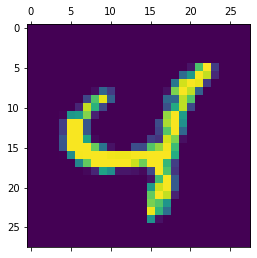

In [131]:
plt.matshow(x_test[67])

In [132]:
y_predicted = model.predict(x_test_flattened)
y_predicted[67]

array([1.7296463e-02, 6.2321291e-05, 1.4584690e-02, 1.6096234e-04,
       9.9773312e-01, 1.1820495e-03, 1.8264025e-01, 5.4690033e-02,
       1.6664016e-01, 4.7687647e-01], dtype=float32)

In [133]:
np.argmax(y_predicted[67])

4

In [135]:
y_predicted_label = [np.argmax(i) for i in y_predicted]
y_predicted_label[:5]

[7, 2, 1, 0, 4]

In [137]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [140]:
cm = tf.math.confusion_matrix(labels = y_test,predictions = y_predicted_label)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 959,    0,    2,    2,    0,    5,    7,    2,    3,    0],
       [   0, 1110,    3,    2,    0,    1,    4,    2,   13,    0],
       [   3,    9,  934,   14,    8,    3,   11,    9,   39,    2],
       [   2,    0,   23,  915,    0,   27,    2,   12,   24,    5],
       [   1,    1,    8,    1,  924,    0,    7,    3,   11,   26],
       [   8,    3,    7,   31,   11,  780,   10,    4,   33,    5],
       [   9,    3,    8,    0,    7,   12,  911,    2,    6,    0],
       [   1,    6,   26,    5,    8,    1,    0,  953,    5,   23],
       [   4,    8,    6,   17,    9,   18,    6,   10,  891,    5],
       [   8,    7,    2,   11,   39,    5,    0,   32,   14,  891]])>

<AxesSubplot:>

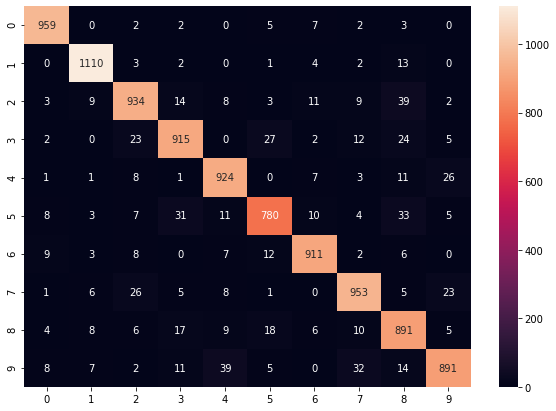

In [142]:
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(cm,annot = True,fmt = 'd')



In [143]:
model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation ='relu'),
    keras.layers.Dense(10,activation ='sigmoid')
])
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(x_train_flattened,y_train,epochs =5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2814 - accuracy: 0.9198
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1288 - accuracy: 0.9624
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0892 - accuracy: 0.9739
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0676 - accuracy: 0.9797
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0529 - accuracy: 0.9837


In [144]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0911 - accuracy: 0.9735


[0.09114944189786911, 0.9735000133514404]

<AxesSubplot:>

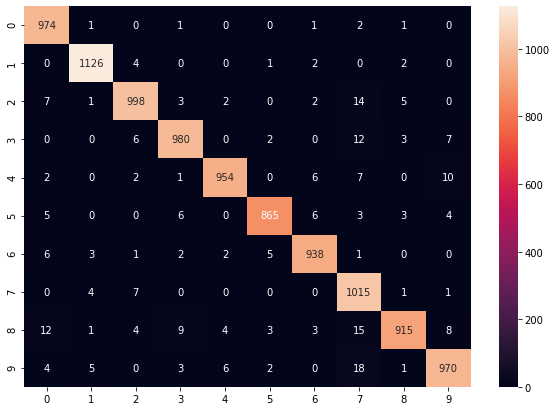

In [146]:
y_predicted = model.predict(x_test_flattened)
y_predicted_label = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels = y_test,predictions = y_predicted_label)
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(cm,annot = True,fmt = 'd')

In [148]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(100,activation ='relu'),
    keras.layers.Dense(10,activation ='sigmoid')
])
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(x_train,y_train,epochs =5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2730 - accuracy: 0.9225
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1232 - accuracy: 0.9643
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0851 - accuracy: 0.9740
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0664 - accuracy: 0.9799
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0510 - accuracy: 0.9845
